In [1]:
# load mnist image data
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
# build the network
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [9]:
# compilation step
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
# preparing image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [11]:
# fit the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2537 - accuracy: 0.9279
Epoch 2/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1036 - accuracy: 0.9689
Epoch 3/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0681 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0502 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0367 - accuracy: 0.9887


In [12]:
# using model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([2.9485239e-10, 2.1421500e-11, 2.2195150e-07, 2.1095659e-06,
       3.5845105e-12, 1.6176599e-09, 1.9903646e-15, 9.9999762e-01,
       5.8533174e-09, 4.9988330e-08], dtype=float32)

In [13]:
predictions[0].argmax()

7

In [14]:
predictions[0][7]

0.9999976

In [15]:
test_labels[0]

7

In [16]:
# evaluate model performance on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

10000/10000 [==============================] - 1s 54us/sample - loss: 0.0686 - accuracy: 0.9803
Test Accuracy: 0.9803000092506409


In [17]:
import numpy as np
# scalar rank 0 tensor
x = np.array(12)
print(x)
print(x.ndim)

12
0


In [18]:
# vector rank 1 tensor
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [19]:
x.ndim

1

In [20]:
# matrix rand 2 or 2D tensor
x = np.array([[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]])
x.ndim

2

In [21]:
train_images.shape

(60000, 784)

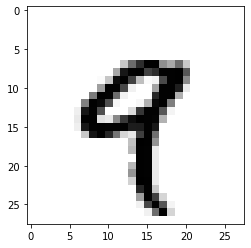

In [22]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# display fourth digit with matplotlib
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [23]:
train_labels[4]

9

In [24]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [25]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [26]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [27]:
# naive python element-wise operation
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

In [28]:
def naive_add(x,y):
    assert len(x.shape) == 2
    assert x.shape ==  y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x

In [29]:
import time

x = np.random.random((20,100))
y = np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0)
print("Took: {0:.5f} s".format(time.time() - t0))

Took: 0.00400 s


In [30]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x,y)
    z = naive_relu(z)
print("Took: {0:.5f} s".format(time.time() - t0))

Took: 1.66397 s


In [31]:
X = np.random.random((32,10))
y = np.random.random((10,))
y.shape

(10,)

In [32]:
# add empty first axis
y = np.expand_dims(y, axis=0)
y.shape

(1, 10)

In [33]:
Y = np.concatenate([y] * 32, axis=0)
Y.shape

(32, 10)

In [34]:
# naive implementation
def naive_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
    return x

In [35]:
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))
z = np.maximum(x,y)

In [36]:
x.shape, y.shape, z.shape

((64, 3, 32, 10), (32, 10), (64, 3, 32, 10))

what does the dot operation do?

In [37]:
def naive_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [38]:
x = np.random.random((20))
y = np.random.random((20))
z = naive_vector_dot(x,y)
z

6.29408994574485

In [39]:
def naive_matrix_vector_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i,j] * y[j]
    return z

In [40]:
x = np.random.random((12,24))
y = np.random.random(24)
z = naive_matrix_vector_dot(x,y)
z

array([5.4176784 , 4.38010138, 5.60904767, 6.04302021, 5.56345093,
       5.53978509, 4.79568466, 5.86960901, 5.66582185, 4.17521493,
       5.9136983 , 5.74588207])

In [41]:
# re-written using previous function
def naive_matrix_vector_dot_2(x,y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i,:], y)
    return z

In [42]:
x = np.random.random((12,24))
y = np.random.random(24)
z = naive_matrix_vector_dot_2(x,y)
z, z.shape

(array([6.67440569, 7.86612102, 7.10858686, 5.1788377 , 4.60816059,
        6.23219411, 7.18176208, 5.70713301, 7.55922473, 6.80638299,
        5.65547013, 7.09565403]),
 (12,))

In [43]:
# naive dot product of two matrices
def naive_matrix_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i,:]
            column_y = y[:,j]
            z[i,j] = naive_vector_dot(row_x, column_y)
    return x

## tensor reshaping example

In [44]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [45]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [46]:
x = x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

## transposition example

In [47]:
x = np.zeros((300,20))
xt = np.transpose(x)
x.shape, xt.shape

((300, 20), (20, 300))

In [48]:
x = .5
y = 1
z = tuple((x,y))
type(z)

tuple

In [49]:
# naive python element-wise operation
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

In [50]:
def naive_add(x,y):
    assert len(x.shape) == 2
    assert x.shape ==  y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x

In [51]:
import time

x = np.random.random((20,100))
y = np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0)
print("Took: {0:.5f} s".format(time.time() - t0))

Took: 0.00400 s


In [52]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x,y)
    z = naive_relu(z)
print("Took: {0:.5f} s".format(time.time() - t0))

Took: 1.62087 s


In [53]:
X = np.random.random((32,10))
y = np.random.random((10,))
y.shape

(10,)

In [54]:
# add empty first axis
y = np.expand_dims(y, axis=0)
y.shape

(1, 10)

In [55]:
Y = np.concatenate([y] * 32, axis=0)
Y.shape

(32, 10)

In [56]:
# naive implementation
def naive_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
    return x

In [57]:
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))
z = np.maximum(x,y)

In [58]:
x.shape, y.shape, z.shape

((64, 3, 32, 10), (32, 10), (64, 3, 32, 10))

what does the dot operation do?

In [59]:
def naive_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [60]:
x = np.random.random((20))
y = np.random.random((20))
z = naive_vector_dot(x,y)
z

5.498760663246569

In [61]:
def naive_matrix_vector_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i,j] * y[j]
    return z

In [62]:
x = np.random.random((12,24))
y = np.random.random(24)
z = naive_matrix_vector_dot(x,y)
z

array([4.57708715, 3.86770252, 4.41698306, 5.31193716, 4.56617181,
       5.90619407, 4.59188536, 5.50918233, 5.61188387, 4.59695098,
       5.22186761, 4.8526773 ])

In [63]:
# re-written using previous function
def naive_matrix_vector_dot_2(x,y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i,:], y)
    return z

In [64]:
x = np.random.random((12,24))
y = np.random.random(24)
z = naive_matrix_vector_dot_2(x,y)
z, z.shape

(array([4.67832071, 5.09837427, 4.46484688, 5.60294125, 4.30878894,
        4.3405967 , 4.15963034, 5.01024672, 5.68447874, 4.14986135,
        5.25997438, 4.02868634]),
 (12,))

In [65]:
# naive dot product of two matrices
def naive_matrix_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i,:]
            column_y = y[:,j]
            z[i,j] = naive_vector_dot(row_x, column_y)
    return x

## tensor reshaping example

In [66]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [67]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [68]:
x = x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

## transposition example

In [69]:
x = np.zeros((300,20))
xt = np.transpose(x)
x.shape, xt.shape

((300, 20), (20, 300))

In [70]:
x = .5
y = 1
z = tuple((x,y))
type(z)

tuple

In [78]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y,x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [79]:
x = tf.Variable(tf.random.uniform((2,2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y,x)
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

## gradient tape with list of variables

In [80]:
W = tf.Variable(tf.random.uniform((2,2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2,2))
with tf.GradientTape() as tape:
    y = tf.matmul(x,W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W,b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.7404577, 1.7404577],
        [0.9680847, 0.9680847]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Back to The First Example

In [82]:
#
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [83]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [84]:
# model compilation
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
# training loop
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2527 - accuracy: 0.9268
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1027 - accuracy: 0.9699
Epoch 3/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0682 - accuracy: 0.9790
Epoch 4/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0499 - accuracy: 0.9849
Epoch 5/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0372 - accuracy: 0.9892
